<a href="https://colab.research.google.com/github/n43ms/Position-Specific-Nutrition-Requirement-Predictor-for-Youth-Soccer-Players/blob/main/backend%20notebook%20(how%20data%20was%20predicted).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

***1) importing the required libraries***

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

***2) reading the data and assigning it to a dataframe***

In [3]:
df=pd.read_csv("project.csv")

***3) EDA- exploratory data analysis***

*describing the dataset*

In [4]:
df.describe()

,age,weight,height,calories/very active pal,protein,carbs,fat,vitamin minerals
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.0,0.0
mean,14.000000,56.860000,163.400000,3444.860000,79.604000,0.0,0.0,NaN
std,2.857143,17.283955,16.089038,746.491768,24.197537,0.0,0.0,NaN
min,10.000000,28.000000,136.000000,2311.000000,39.200000,0.0,0.0,NaN
25%,12.000000,41.250000,147.250000,2791.750000,57.750000,0.0,0.0,NaN
50%,14.000000,59.500000,168.500000,3606.000000,83.300000,0.0,0.0,NaN
75%,16.000000,68.750000,175.750000,3943.750000,96.250000,0.0,0.0,NaN
max,18.000000,91.000000,191.000000,4986.000000,127.400000,0.0,0.0,NaN


*analyzing the first five elements of the dataframe*

In [5]:
df.head()

,position,age,weight,height,calories/very active pal,protein,carbs,fat,vitamin minerals
0,gk,10,36,147,2325,50.4,0,0,NaN
1,def,10,35,145,2401,49.0,0,0,NaN
2,wb,10,30,139,2560,42.0,0,0,NaN
3,mid,10,32,140,2492,44.8,0,0,NaN
4,fwd,10,28,137,2571,39.2,0,0,NaN


*analyzing the items of the dataframe individually*

***4) data preprocessing***

*shortening the name of the column of the database to make it more accessible*

In [6]:
df.rename({"calories/very active pal":"cals"},axis=1,inplace=True)

*replacing null values of each row with the nutritional value from research data*

In [7]:

for i in range (0,50):
  df["protein"][i]=df["protein"][i]*7
  df["fat"][i]=df['cals'][i]*0.244
  if(df["position"][i])=="gk":
    df["carbs"][i]=df["weight"][i]*(3.9*7.5)
  elif(df["position"][i])=="def":
    df["carbs"][i]=df["weight"][i]*(4.3*7.5)
  elif(df["position"][i])=="mid":
    df["carbs"][i]=df["weight"][i]*(5.65*7.5)
  elif(df["position"][i])=="wb":
    df["carbs"][i]=df["weight"][i]*(5.6*7.5)
  elif(df["position"][i])=="fwd":
    df["carbs"][i]=df["weight"][i]*(5.7*7.5)



*verifying replaced values*

In [8]:
print(df['protein'],df["carbs"],df["fat"])

0     352.8
1     343.0
2     294.0
3     313.6
4     274.4
5     362.6
6     333.2
7     284.2
8     313.6
9     313.6
10    519.4
11    509.6
12    421.4
13    401.8
14    421.4
15    470.4
16    460.6
17    382.2
18    411.6
19    382.2
20    656.6
21    627.2
22    509.6
23    578.2
24    568.4
25    666.4
26    617.4
27    578.2
28    588.0
29    568.4
30    705.6
31    735.0
32    666.4
33    666.4
34    637.0
35    774.2
36    686.0
37    607.6
38    695.8
39    656.6
40    891.8
41    852.6
42    715.4
43    754.6
44    666.4
45    872.2
46    754.6
47    637.0
48    676.2
49    686.0
Name: protein, dtype: float64 0     1053.000
1     1128.750
2     1260.000
3     1356.000
4     1197.000
5     1082.250
6     1096.500
7     1218.000
8     1356.000
9     1368.000
10    1550.250
11    1677.000
12    1806.000
13    1737.375
14    1838.250
15    1404.000
16    1515.750
17    1638.000
18    1779.750
19    1667.250
20    1959.750
21    2064.000
22    2184.000
23    2500.125
24    2479

*dropping redundant null values*

In [9]:
df.drop("vitamin minerals",axis=1,inplace=True)

In [10]:
df

,position,age,weight,height,cals,protein,carbs,fat
0,gk,10,36,147,2325,352.8,1053.000,567.300
1,def,10,35,145,2401,343.0,1128.750,585.844
2,wb,10,30,139,2560,294.0,1260.000,624.640
3,mid,10,32,140,2492,313.6,1356.000,608.048
4,fwd,10,28,137,2571,274.4,1197.000,627.324
5,gk,10,37,148,2311,362.6,1082.250,563.884
6,def,10,34,144,2392,333.2,1096.500,583.648
7,wb,10,29,136,2498,284.2,1218.000,609.512
8,mid,10,32,139,2563,313.6,1356.000,625.372
9,fwd,10,32,139,2684,313.6,1368.000,654.896


***5) printing a visual correlation for better understanding of the processed dataset the algorithm will be used on***

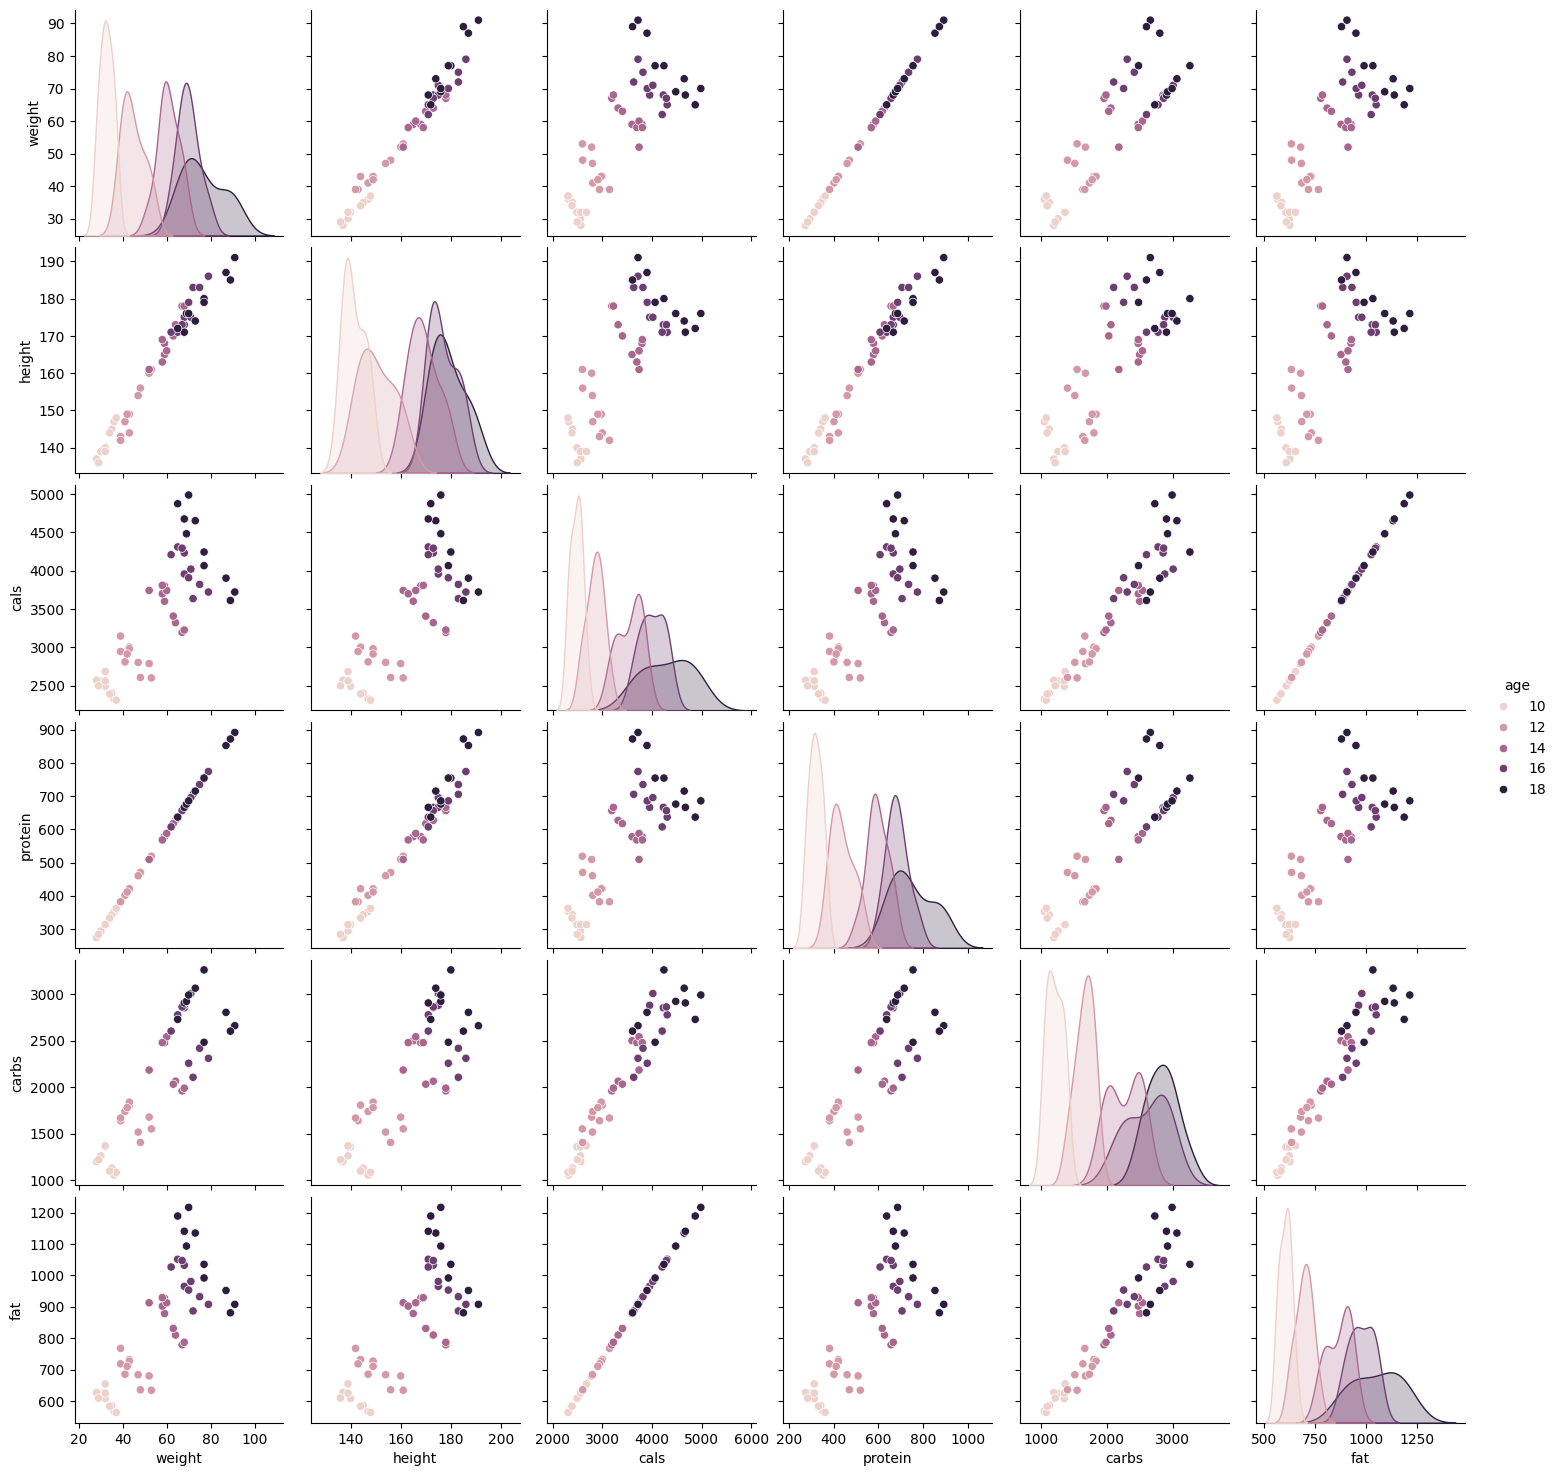

In [11]:

sns.pairplot(data=df,hue='age')


***6) replacing string values with integer values to make the data easier to process for the machine learning model (data preprocessing part 2)***

In [12]:
df=df.replace(to_replace="gk",value=1)
df=df.replace(to_replace="def",value=2)
df=df.replace(to_replace="wb",value=3)
df=df.replace(to_replace="mid",value=4)
df=df.replace(to_replace="fwd",value=5)

In [13]:
df

,position,age,weight,height,cals,protein,carbs,fat
0,1,10,36,147,2325,352.8,1053.000,567.300
1,2,10,35,145,2401,343.0,1128.750,585.844
2,3,10,30,139,2560,294.0,1260.000,624.640
3,4,10,32,140,2492,313.6,1356.000,608.048
4,5,10,28,137,2571,274.4,1197.000,627.324
5,1,10,37,148,2311,362.6,1082.250,563.884
6,2,10,34,144,2392,333.2,1096.500,583.648
7,3,10,29,136,2498,284.2,1218.000,609.512
8,4,10,32,139,2563,313.6,1356.000,625.372
9,5,10,32,139,2684,313.6,1368.000,654.896


***7) importing libraries for model training***

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

***8) seperating target variables and defining the model***

In [15]:
x=df[["position","age","weight","height"]]
y=df[["carbs","protein","fat"]]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
randomforestmodel=RandomForestRegressor(n_estimators=100,random_state=42)
randomforestmodel.fit(x_train,y_train)
y_pred=randomforestmodel.predict(x_test)

***9) examining the predicted values and comparing them with the original dataset***

In [17]:
y_pred

array([[1612.1775 ,  397.978  ,  678.26144],
       [2824.44375,  656.992  , 1023.6532 ],
       [2351.625  ,  729.904  ,  932.85348],
       [2660.1975 ,  836.332  ,  940.22228],
       [1399.155  ,  379.064  ,  641.5004 ],
       [2946.12   ,  681.296  , 1108.67256],
       [2199.5025 ,  627.886  ,  854.48312],
       [2075.2875 ,  666.4    ,  828.99732],
       [2596.11   ,  660.324  ,  989.75916],
       [1491.9825 ,  370.538  ,  659.69548],
       [1548.99   ,  412.776  ,  672.89588],
       [1317.3225 ,  304.192  ,  636.25684],
       [2505.105  ,  634.06   ,  977.05408]])

In [18]:
y_test

,carbs,protein,fat
13,1737.375,401.8,685.640
39,2864.250,656.6,1047.492
30,2106.000,705.6,886.940
45,2603.250,872.2,881.084
17,1638.000,382.2,718.580
48,2923.875,676.2,1093.364
26,2031.750,617.4,831.308
25,1989.000,666.4,787.144
32,2856.000,666.4,1032.364
19,1667.250,382.2,767.868


***10) examining the accuracy of the model***

In [19]:
from sklearn.metrics import r2_score #using r^2 score as a metric for regression models
r2_score(y_test,y_pred)

0.9238434331469746

***11) recieving the users input (player details)***

In [20]:
name=input("ENTER YOUR NAME \n")
new_data=pd.DataFrame({"position":[input("ENTER YOUR POSITION \n('gk' for goalkeeper\n 'def' for defender\n 'mid' for midlfielder\n 'wb' for wing-back\n 'fwd' for forward)\n")],"age":[input("ENTER YOUR AGE (age range 10-18) \n")],"weight":input("ENTER YOUR WEIGHT (IN KGS) \n"),"height":input("ENTER YOUR HEIGHT (IN CM) \n")})

ENTER YOUR NAME 
Aditya Nema
ENTER YOUR POSITION 
('gk' for goalkeeper
 'def' for defender
 'mid' for midlfielder
 'wb' for wing-back
 'fwd' for forward)
fwd
ENTER YOUR AGE (age range 10-18) 
18
ENTER YOUR WEIGHT (IN KGS) 
71
ENTER YOUR HEIGHT (IN CM) 
171


***12) replacing string values with integer values to make the final data easier to predict for the machine learning model (data processing)***

In [21]:
new_data=new_data.replace(to_replace="gk",value=1)
new_data=new_data.replace(to_replace="def",value=2)
new_data=new_data.replace(to_replace="wb",value=3)
new_data=new_data.replace(to_replace="mid",value=4)
new_data=new_data.replace(to_replace="fwd",value=5)


***13) obtaining predicitons from the trained model and storing the caloric values in distinct variables***

In [22]:
new_pred=randomforestmodel.predict(new_data)
prediction=new_pred.tolist()
carbs=prediction[0][0]
prot=prediction[0][1]
fats=prediction[0][2]


***14) creating a final reference dictionary and printing the predicted results***

In [23]:
final_prediction_dictionary = {'c':carbs,'p': prot,'f': fats,'gramsofcarbs':int(carbs/4),'gramsofprot':int(prot/4),'gramsoffat':int(fats/9)}

In [24]:
print(f"Hey {name}, this is how you should distribute your daily caloric intake. All the best!")
print(f"You require {int(final_prediction_dictionary['c'])} calories from carbohydrates; which translates to {final_prediction_dictionary['gramsofcarbs']} grams of carbohydrates.")
print(f"You require {int(final_prediction_dictionary['p'])} calories from protein; which translates to {final_prediction_dictionary['gramsofprot']} grams of protein.")
print(f"You require {int(final_prediction_dictionary['f'])} calories from fats; which translates to {final_prediction_dictionary['gramsoffat']} grams of fat.")
print("Total calories you require in a day are:",int(carbs+prot+fats))

Hey Aditya Nema, this is how you should distribute your daily caloric intake. All the best!
You require 2961 calories from carbohydrates; which translates to 740 grams of carbohydrates.
You require 684 calories from protein; which translates to 171 grams of protein.
You require 1119 calories from fats; which translates to 124 grams of fat.
Total calories you require in a day are: 4764
